# Experimental and numerical investigation of cross-flow turbines

<p class="gap3"<p>

<center>
<img width=200px src="figures/unh.png">
</center>

<p class="gap3"<p>

<center>
by Pete Bachant
<p>
</center>

<center>
Advisor: Martin Wosnik
<p>
</center>

In [1]:
# Setup stuff
%load_ext autoreload
%autoreload 2
import io
import base64
from IPython.display import HTML
from importlib.machinery import SourceFileLoader
%matplotlib inline
import os
talk_dir = os.getcwd()
import matplotlib.pyplot as plt
import seaborn as sns
from pxl.styleplot import set_sns

# Set plot styling
set_sns(context="talk", rc={"lines.markersize": 14, "lines.markeredgewidth": 2, "axes.grid": True, 
                            "font.size": 1.5*14.3})

# Define some directories
exp_dir = "C:/Users/Pete/Research/Experiments"
rvat_baseline_dir = "C:/Users/Pete/Research/Experiments/RVAT baseline"
rvat_re_dep_dir = os.path.join(exp_dir, "RVAT Re dep")

def embed_video(fpath):
    video = io.open(fpath, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<center><video controls loop>
                        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                     </video></center>'''.format(encoded.decode('ascii')))


## What is a cross-flow turbine?

<figure style="float: right">
<img width="420px" src="figures/sandia_vawt.png">
<p class=citation>From Barone and Paquette (2012)</p>
</figure>

* Axis perpendicular to flow
* Little success in onshore wind
* Fatigue issues
* Exaggerated power ratings

<figure>
<img width="50%" src=figures/flowind.jpg>
<p class=citation>From wind-works.org &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;</p>
</figure>

## Kinematics

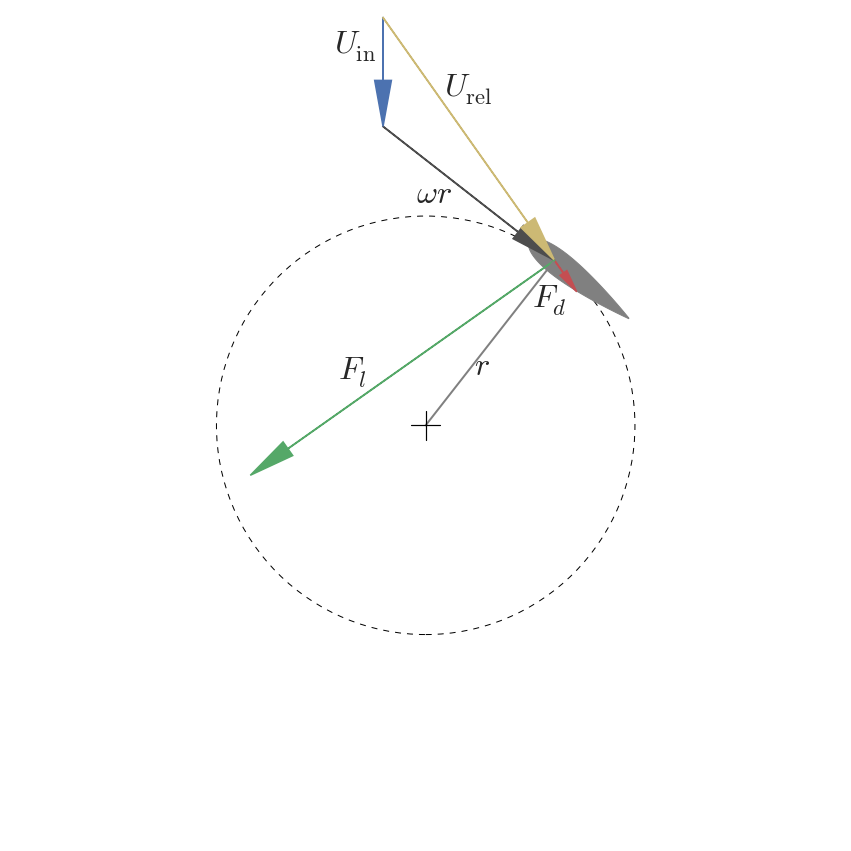

In [2]:
import warnings
warnings.filterwarnings("ignore")
os.chdir(os.path.join(os.path.expanduser("~"), "Google Drive", "Research", "CFT-vectors"))
import cft_vectors
fig, ax = plt.subplots(figsize=(15, 15))
old_fontsize = plt.rcParams["font.size"]
plt.rcParams["font.size"] *= 1.5 
cft_vectors.plot_diagram(fig, ax, theta_deg=52, axis="off", label=True)
os.chdir(talk_dir)
plt.rcParams["font.size"] = old_fontsize

## Kinematics

<center>
<video width=100% controls loop>
  <source src="videos/cft-animation.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>
</center>


<!--
embed_video("C:/Users/Pete/Google Drive/Research/CFT-vectors/videos/cft-animation.mp4")
-->

## Marine hydrokinetics: ORPC

<center>
<img width=60% src=figures/orpc.jpg>
<p>
<img width=60% src=figures/orpc-rivgen.jpg>
<p class=citation>
From orpc.co.
</center>

## Wind turbine arrays: Caltech FLOWE

<center>
<img width=70% src=figures/caltech-flowe.jpg>
<p class=citation>
From flowe.caltech.edu.
</center>

## Research objectives

1. Understand and predict wake recovery to open up array possibilities
2. Improve performance modeling <!--Note: will benefit all bladed-devices!-->
  * Progress in predicting unsteady separating flows

## Turbine test bed

Automated turbine testing in the UNH tow tank

<center>
<img width=80% src="figures/rm2_video_snap.png">
</center>

## UNH tow tank upgrades

* Redesigned broken linear guide system
* Added closed-loop position and velocity control (servo, belt drive)
    * Improved acceleration by an order of magnitude
* Network-based DAQ
* On-board power and networking for turbine test bed
* Multi-axis motion control

## Test bed instrumentation

<center>
<img width=80% src=figures/turbine-test-bed-drawing.PNG>
</center>

## Wake measurement instrumentation

* Nortek Vectrino+ acoustic Doppler velocimeter (ADV)
* $y$–$z$ traversing carriage
* Motion control integration

<center>
<img width=70% src="figures/traverse_alone.jpg">
</center>

## Automation
<!--
Increased number of tows per experiment by order of magnitude.
-->

<center>
<img width=60% src="figures/TurbineDAQ.PNG">
</center>

## Job destruction

Test bed circa 2011:

<center>
<img width=90% src="figures/ivo.PNG">
</center>

## Operation

<center>
<video width=100% controls loop>
  <source src="videos/rm2-low-tsr-tow-edited.mp4" type="video/mp4">
Your browser does not support the video tag.
</video>
</center>

## UNH-RVAT

<img width=44% class="float-right" src="figures/rvat-cad-no-hubs.PNG">

* Simple geometry
* High solidity $(c/R)$
* Baseline experiments
* $U_\infty = 1$ m/s
* Characterize performance
* Understand wake dynamics
* Establish modeling "targets"

## UNH-RVAT baseline performance

<!--
<center>
<img src="figures/test.png" width=80%>
</center>
-->

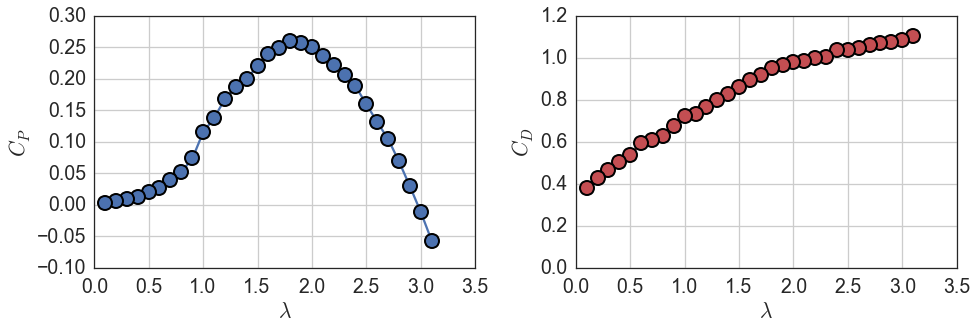

In [3]:
# Generate figures from the experiments by their own methods

os.chdir("C:/Users/Pete/Research/Experiments/RVAT baseline")
import py_rvat_baseline.plotting as rvat_baseline

fig, (ax1, ax2) = plt.subplots(figsize=(14, 5), nrows=1, ncols=2)
rvat_baseline.plot_cp(ax1)
rvat_baseline.plot_cd(ax2, color=sns.color_palette()[2])
fig.tight_layout()

<center>
$\lambda = \frac{\omega R}{U_\infty}$
&nbsp; &nbsp; &nbsp; &nbsp;
$C_P = \frac{P_\mathrm{mech}}{\frac{1}{2}\rho A_\mathrm{f} U_\infty^3}$
&nbsp; &nbsp; &nbsp; &nbsp;
$C_D = \frac{F_\mathrm{drag}}{\frac{1}{2}\rho A_\mathrm{f} U_\infty^2}$
</center>

## Baseline wake measurements $(x/D=1)$

<center>
<img width=80% src="figures/unh-rvat-wake-meas-coord-sys.PNG">
</center>


## UNH-RVAT baseline wake characteristics

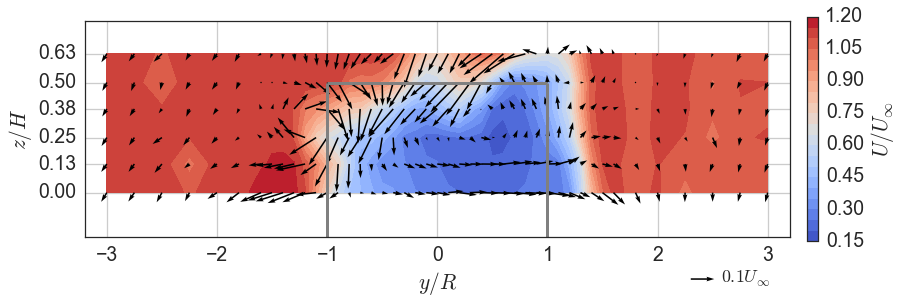

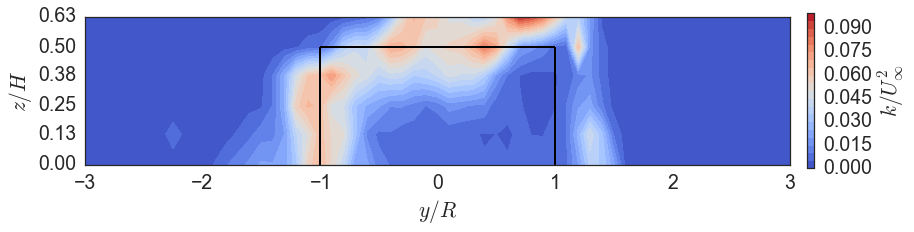

In [4]:
os.chdir(rvat_baseline_dir)
rvat_baseline.plotwake("meancontquiv", scale=1.8)
rvat_baseline.plotwake("kcont", scale=1.8)

## Mean momentum transport

$$
\begin{split}
\frac{\partial U}{\partial x}  =  
\frac{1}{U} \bigg{[}
& - V\frac{\partial U}{\partial y}
- W\frac{\partial U}{\partial z} \\
& -\frac{1}{\rho}\frac{\partial P}{\partial x} \\
& - \frac{\partial}{\partial x} \overline{u'u'}
- \frac{\partial}{\partial y} \overline{u'v'}
- \frac{\partial}{\partial z} \overline{u'w'} \\
& + \nu\left(\frac{\partial^2 U}{\partial x^2}
+ \frac{\partial^2 U}{\partial y^2}
+ \frac{\partial^2 U}{\partial z^2} \right)
\bigg{]}.
\end{split}
$$

## Mean kinetic energy transport

$$
\begin{split}
\frac{\partial K}{\partial x}
=
\frac{1}{U}
\bigg{[}
& - \underbrace{V \frac{\partial K}{\partial y}}_{y\text{-adv.}}
- \underbrace{W \frac{\partial K}{\partial z}}_{z\text{-adv.}}
% Pressure work:
- \frac{1}{\rho}\frac{\partial}{\partial x_j} P U_i \delta_{ij}
% Work by viscous forces
+ \frac{\partial}{\partial x_j} 2 \nu U_i S_{ij} \\ % Not sure if that's capital S...
% Turbulent transport of K
& - \underbrace{
\frac{1}{2}\frac{\partial}{\partial x_j} \overline{u_i' u_j'} U_i
}_{\text{Turb. trans.}}
% Production of k 
+ \underbrace{
\overline{u_i' u_j'} \frac{\partial U_i}{\partial x_j}
}_{k\text{-prod.}}
% Mean dissipation? Bar could be removed, or no? -- yes, capital letter, no bar.
- 
\underbrace{
2 \nu S_{ij}S_{ij}
}_{\text{Mean diss.}}
\bigg{]}.
\end{split}
$$

## Mean momentum transport

Weighted averages at $x/D=1$:

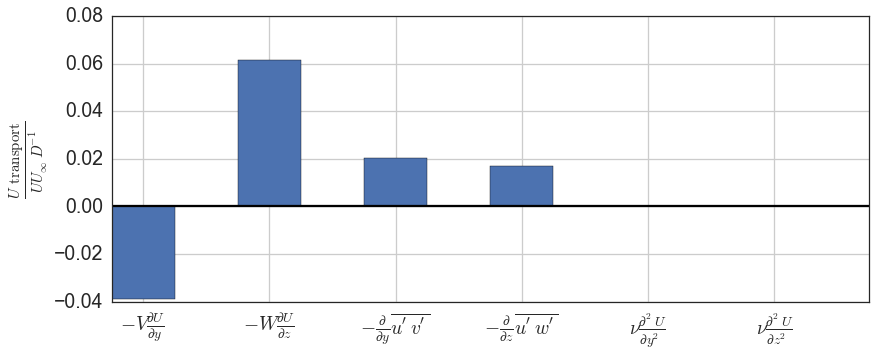

In [5]:
os.chdir("C:/Users/Pete/Research/Experiments/RVAT baseline")
import py_rvat_baseline.plotting as rvat_baseline

rvat_baseline.plotwake("mombargraph", scale=1.8, barcolor=None)
plt.grid(True)

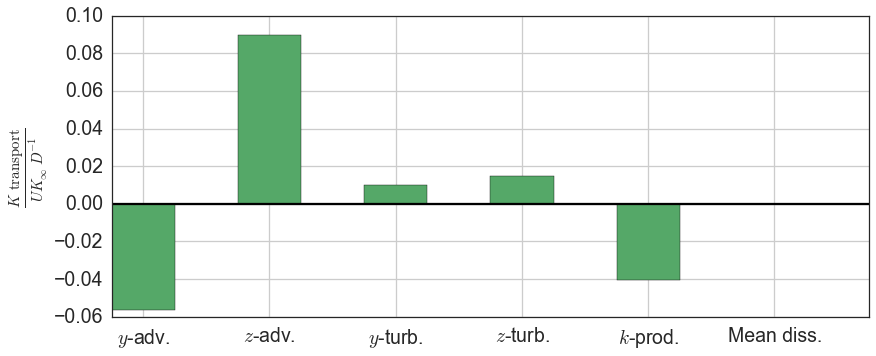

In [6]:
os.chdir("C:/Users/Pete/Research/Experiments/RVAT baseline")
import py_rvat_baseline.plotting as rvat_baseline

rvat_baseline.plotwake("Kbargraph", scale=1.8, barcolor=sns.color_palette()[1])
plt.grid(True)

## UNH-RVAT Reynolds number dependence

* Are our results relevant to full scale?
* Models should be validated for the scales at which they will be applied, if possible
* How cheap (small, slow) can experiments get?

$$
Re = \frac{Ul}{\nu}
$$

## UNH-RVAT Reynolds number dependence

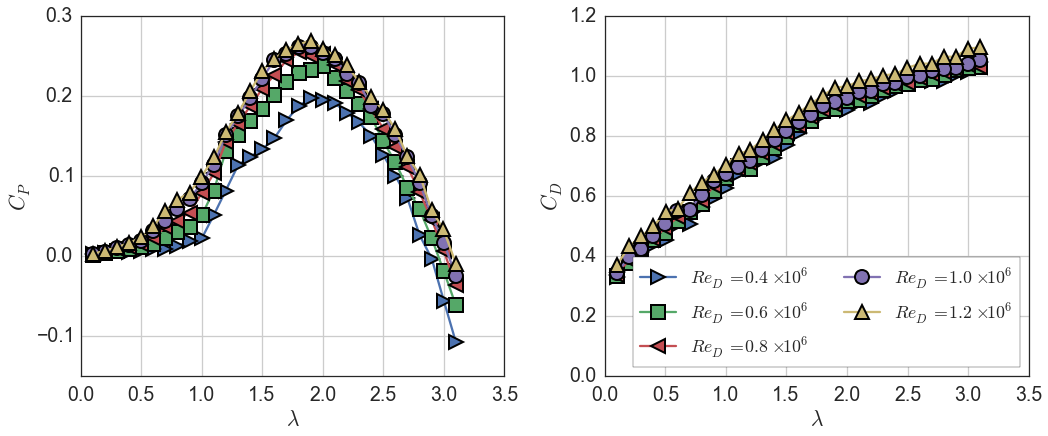

In [7]:
os.chdir(rvat_re_dep_dir)
import py_rvat_re_dep.plotting as rvat_re_dep

fig, (ax1, ax2) = plt.subplots(figsize=(15, 6.5), nrows=1, ncols=2)
rvat_re_dep.plot_perf_curves(ax1, ax2)
fig.tight_layout()

## Reynolds number dependence at $\lambda = 1.9$

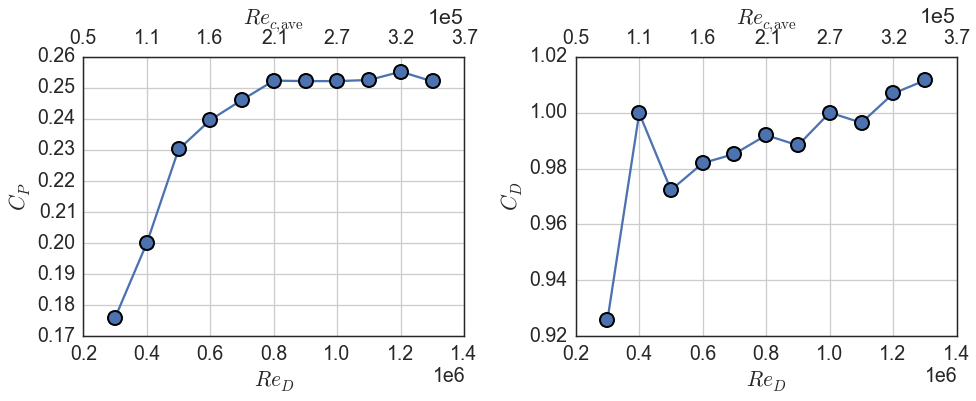

In [8]:
os.chdir(rvat_re_dep_dir)
import py_rvat_re_dep.plotting as rvat_re_dep

fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)
rvat_re_dep.plot_perf_re_dep(ax1, ax2)
fig.tight_layout()

## Blade boundary layer dynamics

<center>
<img src="figures/McMasters-Henderson-1980.PNG" width=70%>

<p class="citation">From McMasters and Henderson (1980)</p>
</center>


## Wake transport

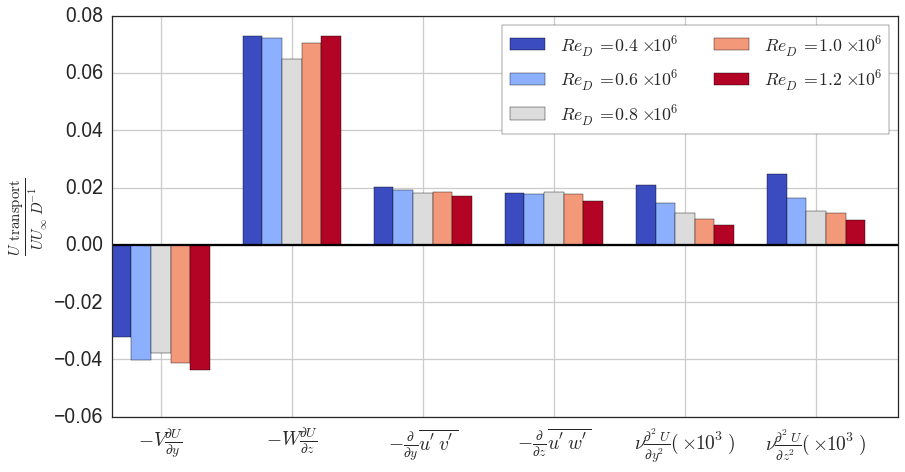

In [9]:
os.chdir(rvat_re_dep_dir)
import py_rvat_re_dep.plotting as rvat_re_dep

fig, ax = plt.subplots(figsize=(13, 7))
rvat_re_dep.make_mom_bar_graph(ax, print_analysis=False)
fig.tight_layout()

## Wake transport totals

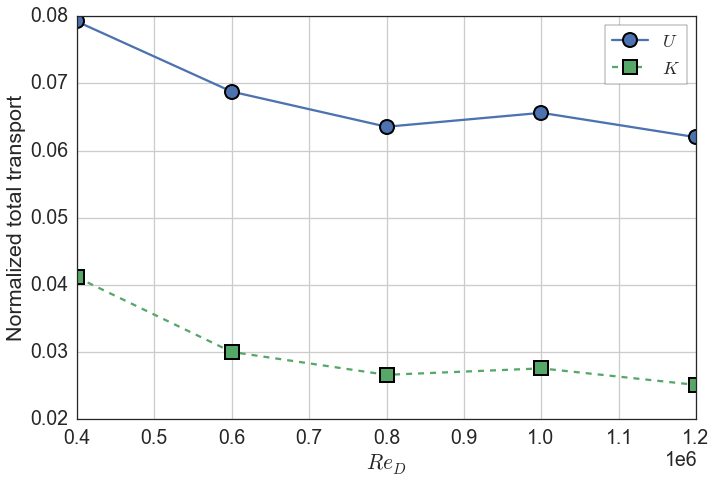

In [10]:
os.chdir(rvat_re_dep_dir)
import py_rvat_re_dep.plotting as rvat_re_dep

fig, ax = plt.subplots()
rvat_re_dep.plot_wake_trans_totals(ax, emptymarkers=False, ucolor=sns.color_palette()[0], 
                                   kcolor=sns.color_palette()[1])
fig.tight_layout()

## Numerical modeling

* Experiments are expensive
* Can be difficult to modify, e.g., turbine geometry
* Scaling issues
* Can we compute instead?

## Techniques

* **Blade element methods:** Use section characteristics to predict loading
  * Momentum: Very cheap, issues with high solidity, very little flow information
  * Vortex (potential flow): Cheap, also issues with high solidity, no turbulence
* **Navier–Stokes:** Turbulence modeled via RANS or LES (no DNS possible at this $Re$, yet)
  * Highest cost

## UNH-RVAT blade-resolved RANS

<div>
<ul>
<li>Simulate baseline with OpenFOAM</li>
<img width="60%" style="float: right" src="figures/3D_vorticity_SA_964_10-threshold.png"/>
<li>Need to resolve the boundary layer</li>
  <ul>
  <li>Separation</li>
  <li>Transition?</li>
  </ul>
<li>Turbulence models (eddy viscosity)</li>
  <ul>
  <li>$k$–$\omega$ SST</li>
  <li>Spalart–Allmaras</li>
  </ul>
<li>2-D: $\sim 1$ CPU hour</li>
<li>3-D: $\sim 10^4$ CPU hours</li>
  <ul>
  <li>Feasible to replace experiments?</li>
  <li>"Interpolate" wake measurements?</li>
  </ul>
</ul>

</div>

## Overall mesh topology

<center>
<img width=65% src="figures/2D_mesh.PNG">
</center>

## Near-wall blade mesh

<center>
<img width=60% src="figures/2D_blade_mesh_closeup.PNG">
</center>

$$
y^+ \sim 1
$$

## Verification (2-D)

<center>
<img width=90%, src="figures/br-cfd-verification.png">
</center>

## Performance predictions

<center>
<img width=90%, src="figures/br-cfd-perf_bar_chart.png">
</center>

## Near-wake mean velocity (SA 3-D vs. experiment)

<center>
<img width=65%, src="figures/br-cfd-meancontquiv_SpalartAllmaras.png">
</center>

<center>
<img width=65%, style="padding-left: 45px", src="figures/br-cfd-meancontquiv_exp.png">
</center>

## Near-wake mean velocity (SST 3-D vs. experiment)

<center>
<img width=65%, src="figures/br-cfd-meancontquiv_kOmegaSST.png">
</center>

<center>
<img width=65%, style="padding-left: 45px", src="figures/br-cfd-meancontquiv_exp.png">
</center>

## Near-wake TKE (SA 3-D vs. experiment)

<center>
<img width=80%, src="figures/br-cfd-kcont_SpalartAllmaras.png">
</center>

<center>
<img width=80%, src="figures/br-cfd-kcont_exp.png">
</center>

## Near-wake TKE (SST 3-D vs. experiment)

<center>
<img width=80%, src="figures/br-cfd-kcont_kOmegaSST.png">
</center>

<center>
<img width=80%, src="figures/br-cfd-kcont_exp.png">
</center>

## Near-wake momentum transport

<center>
<img width=90%, src="figures/br-cfd-mom_bar_graph.png">
</center>

## Summary: Blade-resolved CFD

* 2-D feasible but poor predictor of performance and wake
* 3-D _may_ be good for single turbine, but too expensive for arrays

## Actuator line modeling

* Developed by Sorensen and Shen (2002)
* Blade element method coupled with Navier–Stokes
* Save computational resources
  * No finely resolved blade boundary layers
  * No complicated meshing
  * No mesh motion
* More physical description of wake evolution, turbulence
* Should resolve wakes of high solidity turbine blades


## Computing blade loading

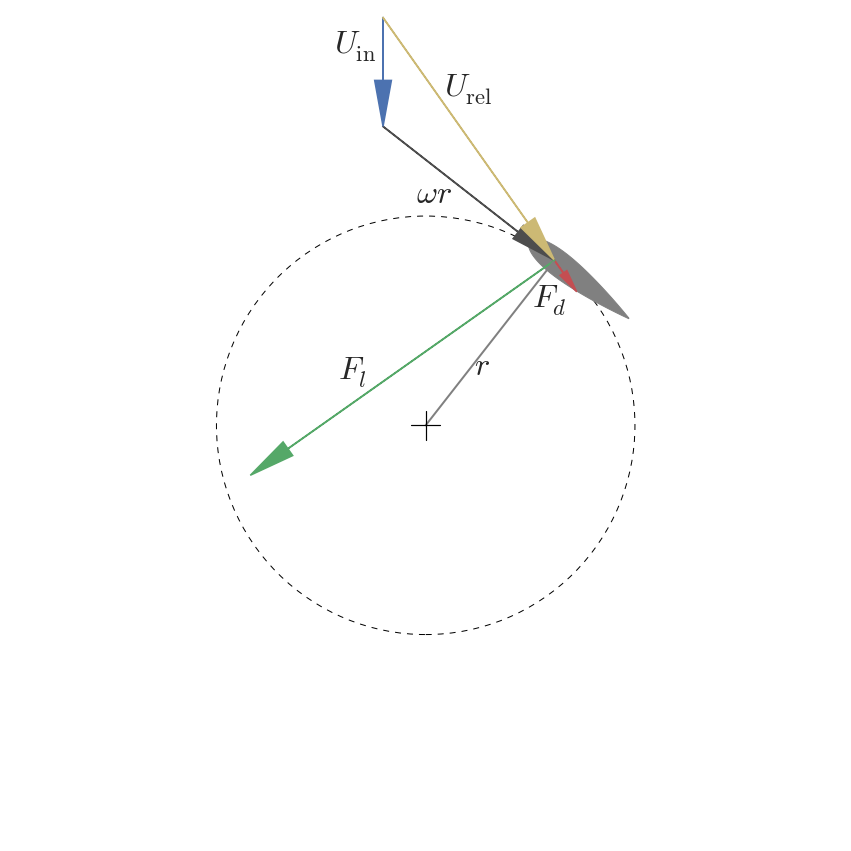

In [11]:
import warnings
warnings.filterwarnings("ignore")
os.chdir(os.path.join(os.path.expanduser("~"), "Google Drive", "Research", "CFT-vectors"))
import cft_vectors
fig, ax = plt.subplots(figsize=(15, 15))
old_fontsize = plt.rcParams["font.size"]
plt.rcParams["font.size"] *= 1.5 
cft_vectors.plot_diagram(fig, ax, theta_deg=52, axis="off", label=True)
os.chdir(talk_dir)
plt.rcParams["font.size"] = old_fontsize

## Existing ALMs

* Shamsoddin and Porte-Agel (2014)
  * Cross-flow turbines in LES
  * Closed source
* NREL's SOWFA
  * Open source OpenFOAM extension
  * Axial-flow turbines only
  * Mostly procedural style (hard to adapt for CFTs, many nested loops)
  
Time to write a new one!

## New ALM library: `turbinesFoam`

### Primary objectives

* Simulate a standalone CFT in 3-D at $O(1)$ CPU hours per operating condition
* Reasonable accuracy predicting performance (high and low solidity CFTs)
* Match RVAT near-wake characteristics
  * Mean velocity
  * Turbulence kinetic energy
  * Transport terms
* Capture CFT "constructive interference" (Li and Calisal, 2010)


### Secondary objectives

* Also simulate AFTs
* Easily automated, e.g. for finding optimal array layouts

## Why OpenFOAM?

Free, open-source, large user and support community.

Analyzing thread and post counts on the CFD Online forums:
<center>
<img width=80% src="figures/CFD-pop_cfd-online.png">
</center>


## Flow field coupling

AL force added to Navier–Stokes as body force source term at element positions:

$$
\frac{\partial \vec{u}}{\partial t} + \vec{u} \cdot \nabla \vec{u} = -\frac{1}{\rho}\nabla p + \nabla^2 \vec{u} + \boxed{\vec{f}}
$$

Force is smoothed outwards with a spherical Gaussian function to avoid numerical instability.

## Implementation

OpenFOAM extension library using `fvOptions` generic mechanism for adding sources at run time:

```c++
// Solve the Momentum equation

tmp<fvVectorMatrix> UEqn
(
    fvm::ddt(U)
  + fvm::div(phi, U)
  + turbulence->divDevReff(U)
 ==
    fvOptions(U)
);
```

Leverage existing solvers, parallelization, turbulence models. _No wheel reinvention._

## Implementation

* An actuator line is composed of elements for which section coefficient data is available
* Turbine composed of actuator lines—blades, struts, shafts, towers, etc. (any profile)
* Use OpenFOAM's object oriented style to easily "reuse" actuator line code in both CFT and AFT (maintainability!)
* Open source: https://github.com/turbinesFoam

## UNH-RVAT actuator line simulation

* Preliminary validation
* Standard $k$–$\epsilon$ RANS model
* Similar domain and BCs as 3-D blade-resolved case
* Leishman–Beddoes DS model modified by Sheng et al. (2008)
* Flow curvature correction from Goude (2012)
* Ad hoc end effects model (full elliptical taper)

## UNH-RVAT actuator line simulation: Mesh

<center>
<img width=80% src=figures/alm-mesh.PNG>
</center>

## Preliminary results: UNH-RVAT performance

<center>
<img width=80% src=figures/UNH-RVAT-turbinesFoam_perf-curves.png>
</center>

## Near-wake mean velocity (ALM)

<center>
<img width=65%, src="figures/UNH-RVAT-turbinesFoam_meancontquiv.png">
</center>

<center>
<img width=65%, style="padding-left: 45px", src="figures/br-cfd-meancontquiv_exp.png">
</center>

## Near-wake TKE (ALM vs. experiment)

<center>
<img width=80%, src="figures/UNH-RVAT-turbinesFoam_kcont.png">
</center>

<center>
<img width=80%, src="figures/br-cfd-kcont_exp.png">
</center>

## Near-wake momentum transport (ALM)

<center>
<img width=90%, src="figures/UNH-RVAT-turbinesFoam_recovery-bar-chart.png">
</center>

## Conclusions

* ALM results are promising
  * Reduce computational effort by $\sim 10^4$ in 3-D RANS (not including meshing)
  * Performance predictions close to 3-D B-R RANS at optimal $\lambda$
  * Overprediction of $C_P$ at high $\lambda$
  * More flow information than momentum or vortex methods—better array modeling

## Future work: LES

<center>
<video width=100% controls loop>
  <source src="videos/unh-rvat-alm-les.ogv" type="video/ogg">
Your browser does not support the video tag.
</video>
</center>

<!--
<center>
<iframe width="1000" height="500" src="https://www.youtube.com/embed/THZvV4R1vow?rel=0&autoplay=0" frameborder=0 allowfullscreen></iframe>
</center>
-->

## Issues to resolve

* Blade-vortex interaction
* End effects model
* Added mass
* Blade BL turbulence "injection" (calibration via 2-D RANS)

<center>
<img width=80% src=figures/turbulence-injection.PNG>
</center>

## Future future work: UNH-RVAT with free surface

Validation may be done by someone else!

<center>
<video width=100% controls loop>
  <source src="videos/unh-rvat-alm-free-surface.ogv" type="video/ogg">
Your browser does not support the video tag.
</video>
</center>

## Future future work: Axial-flow turbine

Extensive AFT validation case by Krogstad and Adaramola (2012)

<center>
<img width=70% src=figures/aft-alm.PNG>
</center>

## Acknowledgements

<center>
<img width=200px src=figures/nsf.PNG>
<img width=200px src=figures/us-doe.PNG>
<img width=200px src=figures/snl_logo.PNG>
</center>
